## BAF Veri Seti İnceleme

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.ensemble import RandomForestClassifier

In [38]:
base = pd.read_csv("base.csv")

In [39]:
base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [40]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [41]:
base.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [42]:
def display_value_counts(dataframe):
    for col in dataframe.columns:
        print(f"Column: {col}")
        print(f"Unique values: {dataframe[col].nunique()}")  
        print("-" * 40)
        
display_value_counts(base)

Column: fraud_bool
Unique values: 2
----------------------------------------
Column: income
Unique values: 9
----------------------------------------
Column: name_email_similarity
Unique values: 998861
----------------------------------------
Column: prev_address_months_count
Unique values: 374
----------------------------------------
Column: current_address_months_count
Unique values: 423
----------------------------------------
Column: customer_age
Unique values: 9
----------------------------------------
Column: days_since_request
Unique values: 989330
----------------------------------------
Column: intended_balcon_amount
Unique values: 994971
----------------------------------------
Column: payment_type
Unique values: 5
----------------------------------------
Column: zip_count_4w
Unique values: 6306
----------------------------------------
Column: velocity_6h
Unique values: 998687
----------------------------------------
Column: velocity_24h
Unique values: 998940
----------------

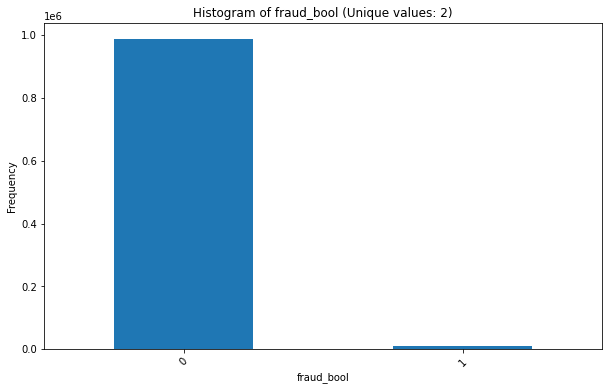

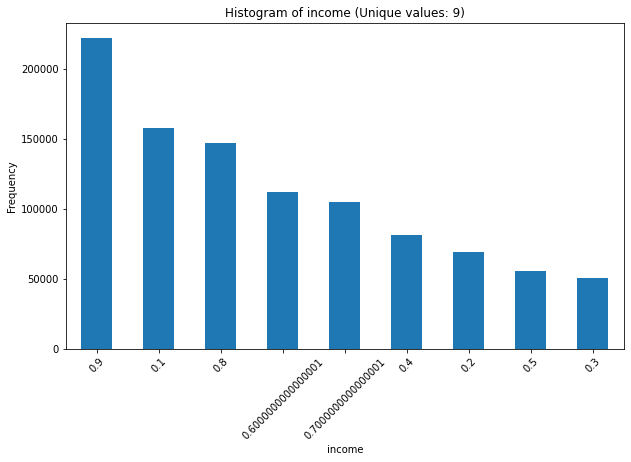

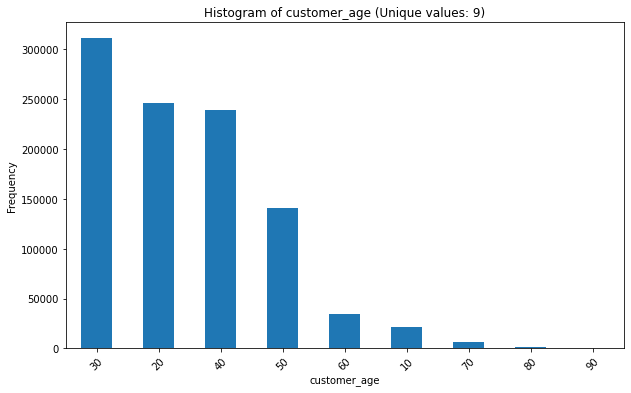

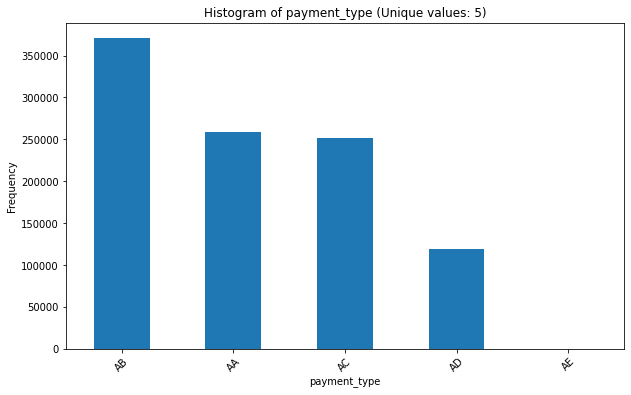

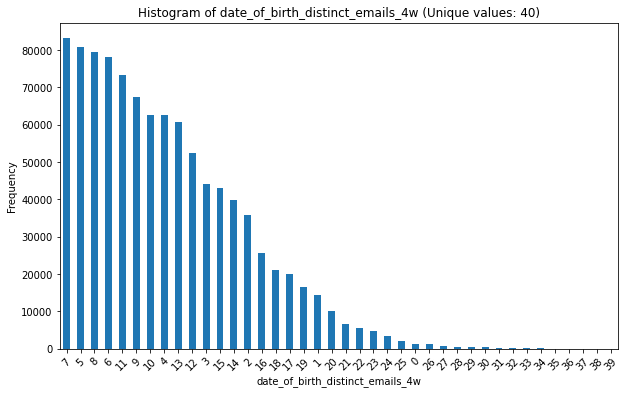

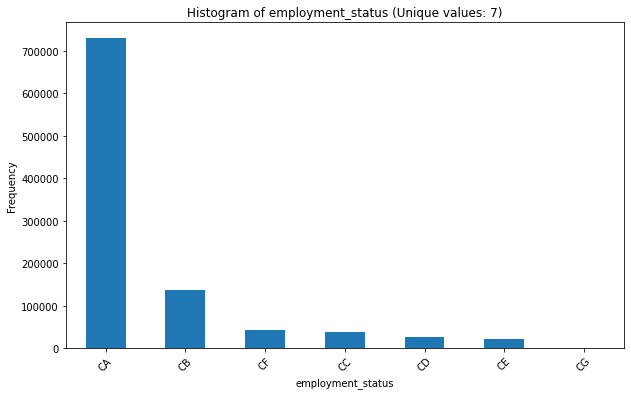

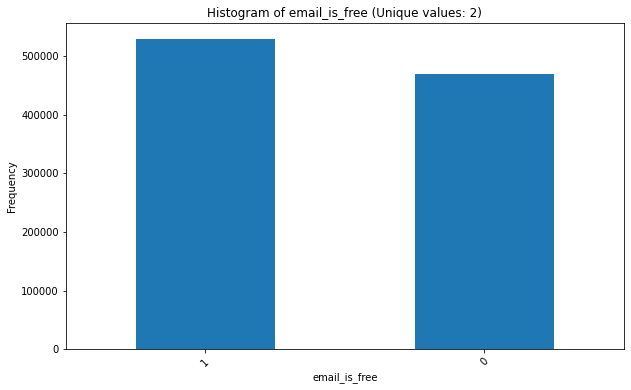

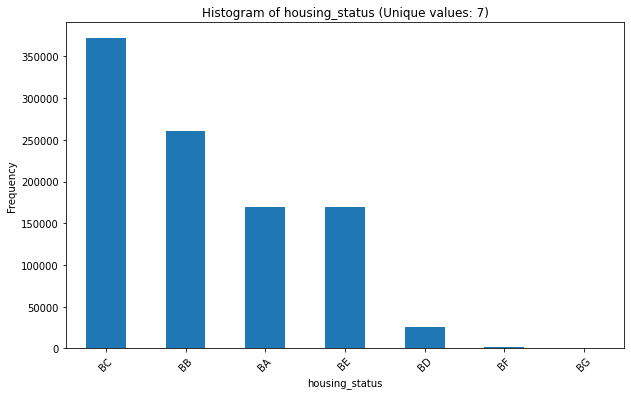

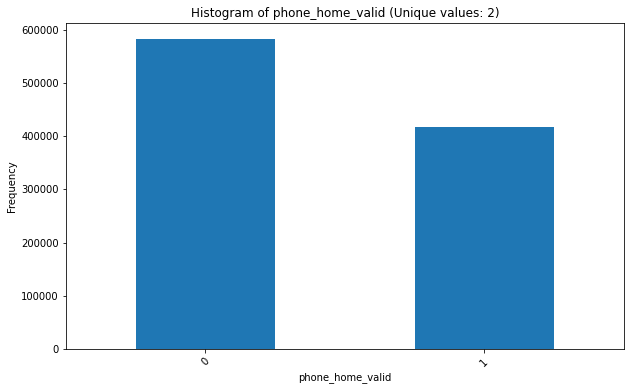

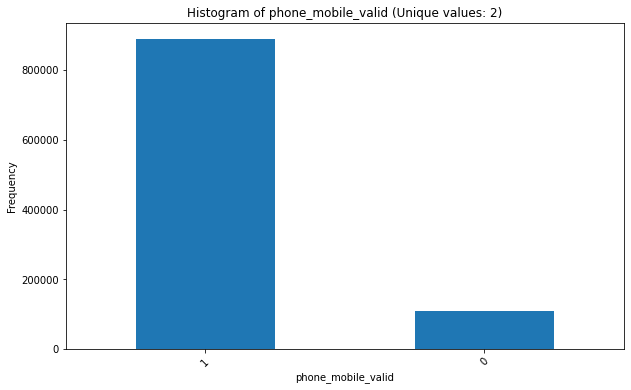

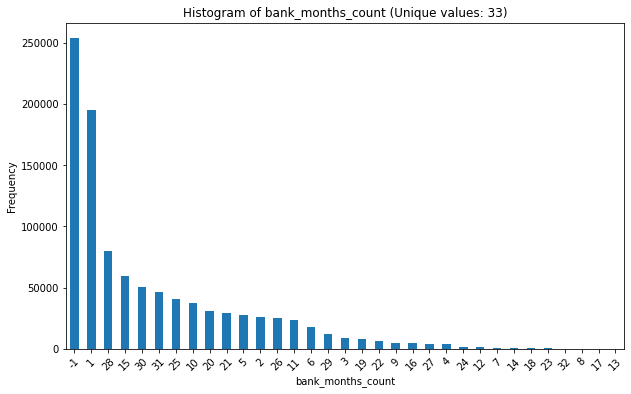

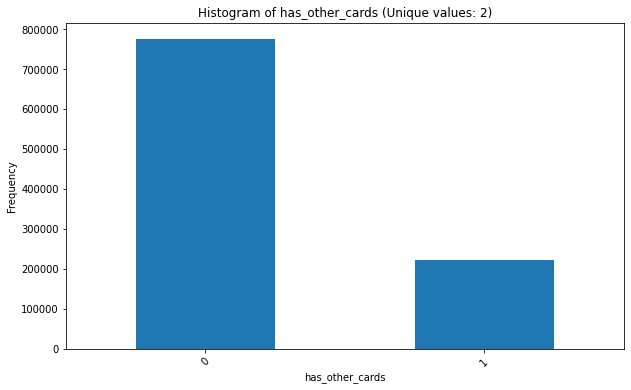

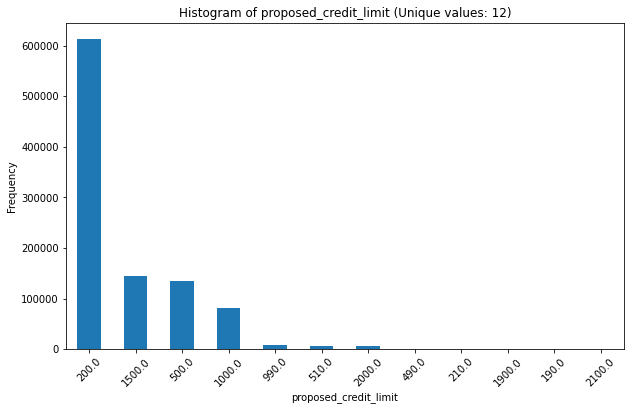

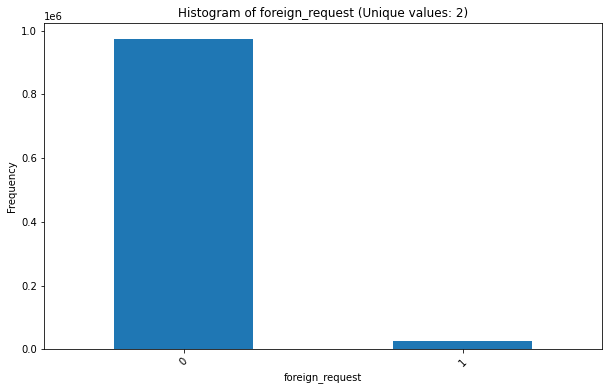

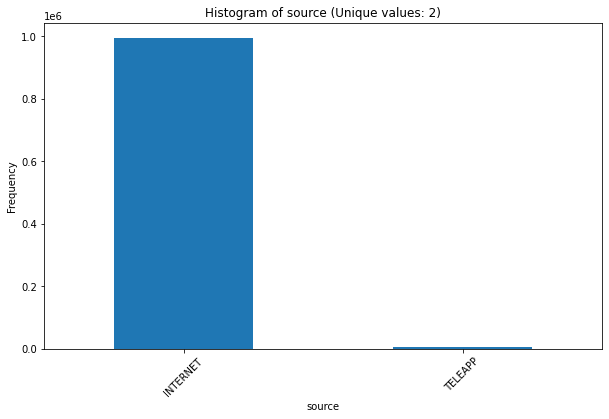

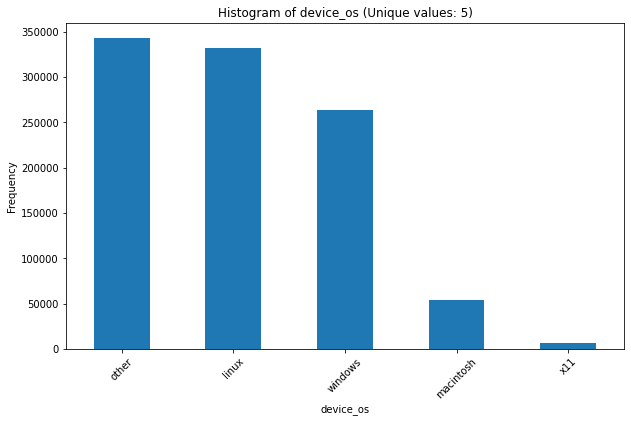

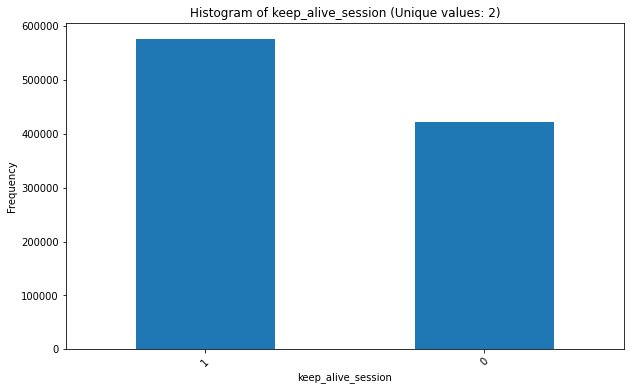

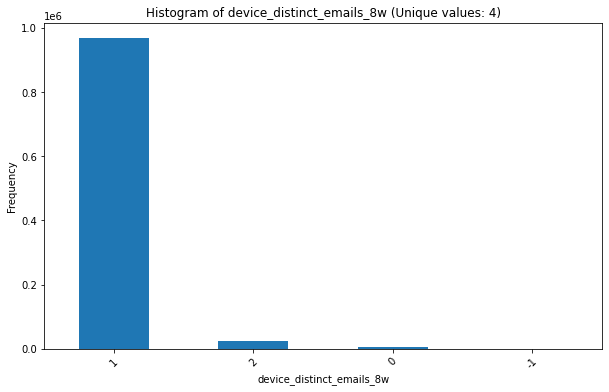

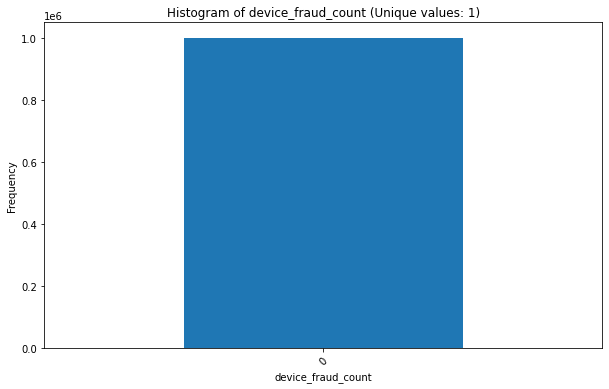

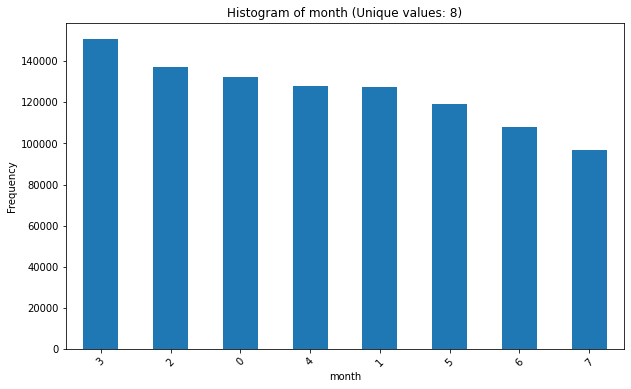

In [43]:
def display_histograms_under_threshold(dataframe, threshold=200):
    for col in dataframe.columns:
        unique_count = dataframe[col].nunique()
        if unique_count < threshold:
            plt.figure(figsize=(10, 6))
            dataframe[col].value_counts().plot(kind='bar')
            plt.title(f'Histogram of {col} (Unique values: {unique_count})')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()

display_histograms_under_threshold(base)

In [44]:
def col_names(dataframe, cat_th = 200):
    
    
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_cols = cat_cols + num_but_cat
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols

cat_cols, num_cols = col_names(base)

In [45]:
cat_cols

['payment_type',
 'employment_status',
 'housing_status',
 'source',
 'device_os',
 'fraud_bool',
 'income',
 'customer_age',
 'date_of_birth_distinct_emails_4w',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


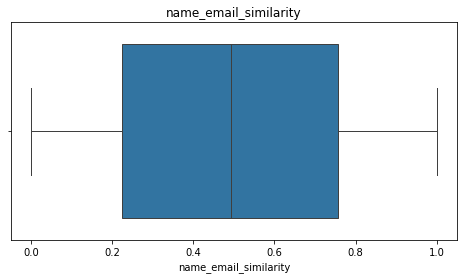

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


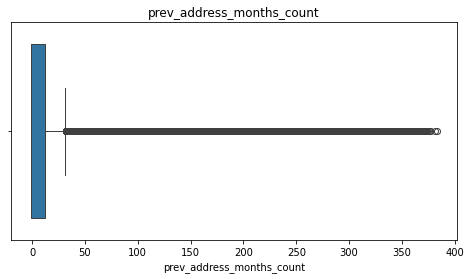

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


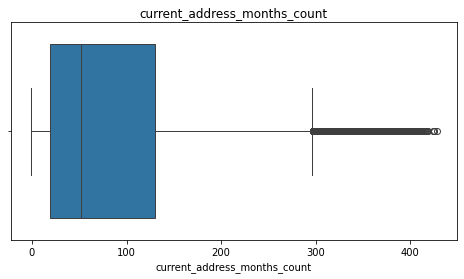

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


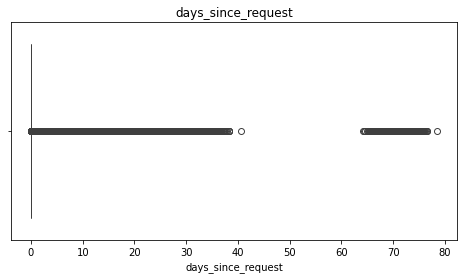

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


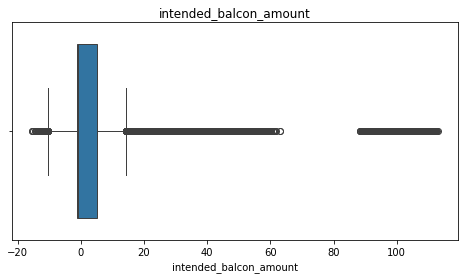

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


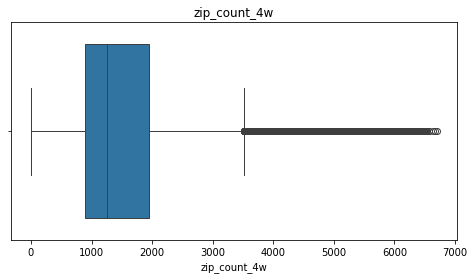

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


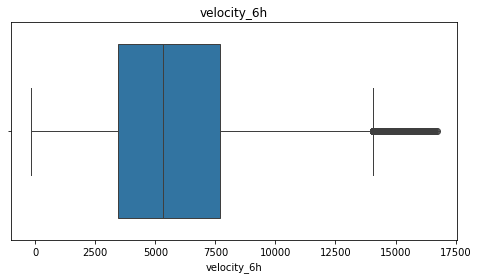

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


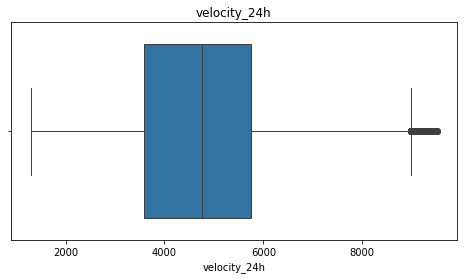

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


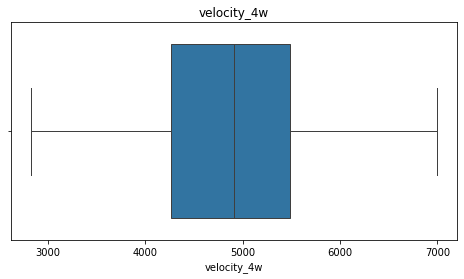

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


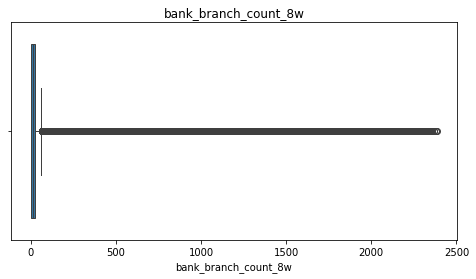

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


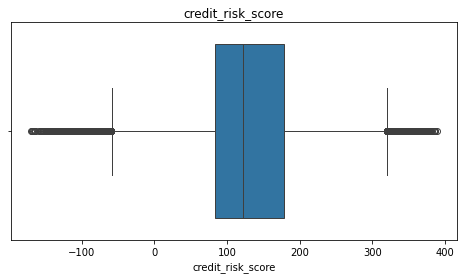

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


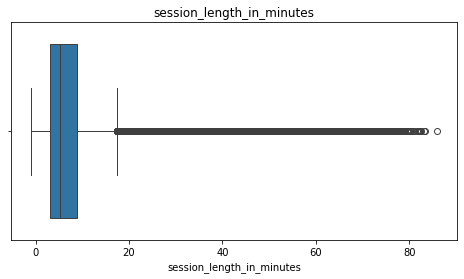

In [46]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=base[col])
    plt.title(f'{col}')
    plt.show()

In [47]:
filtered_df = base[base['prev_address_months_count'] > 350]
print(f"{filtered_df.shape[0]}")

222


In [48]:
filtered_df = base[base['current_address_months_count'] > 400]
print(f"{filtered_df.shape[0]}")

57


In [ ]:
filtered_df = base[base['zip_count_4w'] > 6500]
print(f"{filtered_df.shape[0]}")

In [ ]:
filtered_df = base[base['velocity_6h'] > 16000]
print(f"{filtered_df.shape[0]}")

In [ ]:
filtered_df = base[base['velocity_24h'] > 9300]
print(f"{filtered_df.shape[0]}")

In [ ]:
filtered_df = base[base['bank_branch_count_8w'] > 2250]
print(f"{filtered_df.shape[0]}")

In [ ]:
filtered_df = base[base['session_length_in_minutes'] >75]
print(f"{filtered_df.shape[0]}")

In [19]:
lelist = []

def display_value_counts(dataframe):
    for col in dataframe.columns:
        unique_values_count = dataframe[col].nunique()
        if unique_values_count>2 and unique_values_count <= 40:
            lelist.append(col)
            
display_value_counts(base)

In [20]:
lelist

['income',
 'customer_age',
 'payment_type',
 'date_of_birth_distinct_emails_4w',
 'employment_status',
 'housing_status',
 'bank_months_count',
 'proposed_credit_limit',
 'device_os',
 'device_distinct_emails_8w',
 'month']

In [21]:
lelist = ['income', 'customer_age', 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os', 'device_distinct_emails_8w', 'device_fraud_count', 'month']

In [22]:
base= pd.get_dummies(base, columns=lelist, drop_first=True)

In [23]:
boolean_columns = base.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    base[column] = base[column].astype(int)

In [24]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 69 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   name_email_similarity             1000000 non-null  float64
 2   prev_address_months_count         1000000 non-null  int64  
 3   current_address_months_count      1000000 non-null  int64  
 4   days_since_request                1000000 non-null  float64
 5   intended_balcon_amount            1000000 non-null  float64
 6   zip_count_4w                      1000000 non-null  int64  
 7   velocity_6h                       1000000 non-null  float64
 8   velocity_24h                      1000000 non-null  float64
 9   velocity_4w                       1000000 non-null  float64
 10  bank_branch_count_8w              1000000 non-null  int64  
 11  date_of_birth_distinct_emails_4w  1000

In [25]:
outlier_thresholds = {
    'prev_address_months_count': 350,
    'current_address_months_count': 400,
    'zip_count_4w': 6500,
    'velocity_6h': 16000,
    'velocity_24h': 9300,
    'bank_branch_count_8w': 2250,
    'session_length_in_minutes': 75
}

def impute_outliers(df, column, outlier_indices):
    df_without_outlier = df.drop(outlier_indices)
    outlier_rows = df.loc[outlier_indices]
    
    for index, outlier_row in outlier_rows.iterrows():
        df_without_outlier_values = df_without_outlier.drop(columns=[column])
        outlier_vector = outlier_row.drop(labels=[column])
        
        distances = euclidean_distances([outlier_vector], df_without_outlier_values)
        
        nearest_indices = np.argsort(distances[0])[:5]
        similar_rows = df_without_outlier.iloc[nearest_indices]
        
        mean_value = similar_rows[column].mean()
        df.loc[index, column] = mean_value
    
    return df

def get_outlier_indices(df, column, threshold):
    return df[df[column] > threshold].index

for column, threshold in outlier_thresholds.items():
    outlier_indices = get_outlier_indices(base, column, threshold)
    if not outlier_indices.empty:
        base = impute_outliers(base, column, outlier_indices)

C:\Users\Beyza\AppData\Local\Temp\ipykernel_7176\929708310.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, column] = mean_value
C:\Users\Beyza\AppData\Local\Temp\ipykernel_7176\929708310.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '61.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, column] = mean_value
C:\Users\Beyza\AppData\Local\Temp\ipykernel_7176\929708310.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2203.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, column] = mean_value
C:\Users\Beyza\AppData\

Hedef değişken ile mutlak korelasyonu 0.6'dan büyük olan özellikler:
Index(['fraud_bool'], dtype='object')


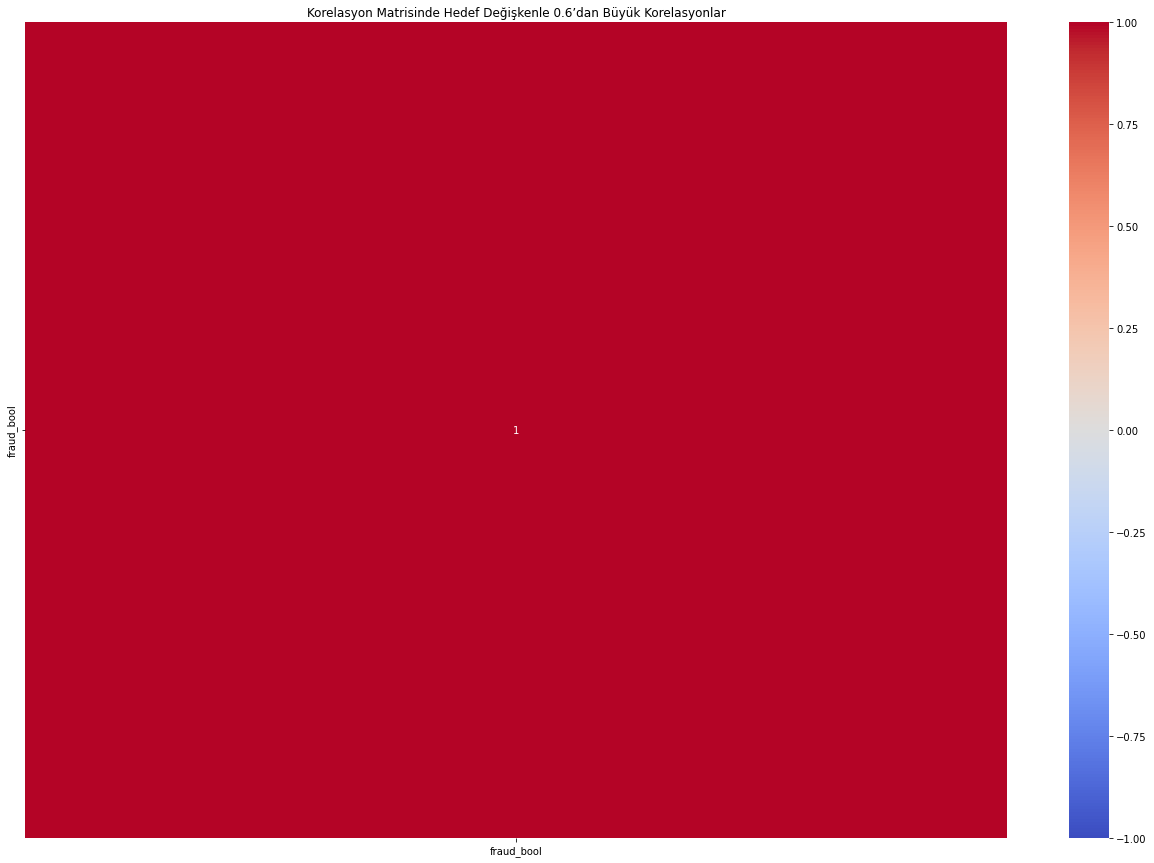

In [31]:
target = 'fraud_bool'

correlation_matrix = base.corr()
target_correlation = correlation_matrix[target].abs()
high_correlation_features = target_correlation[target_correlation > 0.6].index

print("Hedef değişken ile mutlak korelasyonu 0.6'dan büyük olan özellikler:")
print(high_correlation_features)

plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix.loc[high_correlation_features, high_correlation_features], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasyon Matrisinde Hedef Değişkenle 0.6’dan Büyük Korelasyonlar')
plt.show()

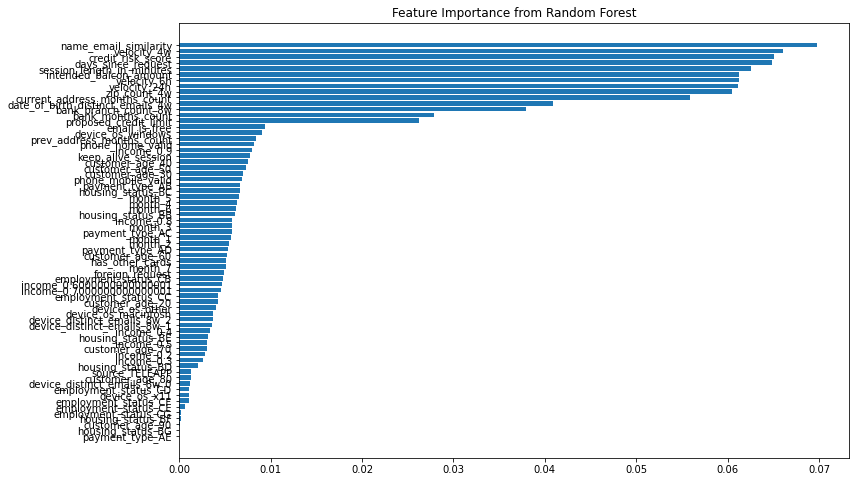

In [28]:
X = base.drop(columns=['fraud_bool'])
y = base['fraud_bool'] 

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance from Random Forest')
plt.show()

In [29]:
base = base.drop(columns=['prev_address_months_count'],axis=1)

In [30]:
base.head()

,fraud_bool,name_email_similarity,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,device_distinct_emails_8w_0,device_distinct_emails_8w_1,device_distinct_emails_8w_2,month_1,month_2,month_3,month_4,month_5,month_6,month_7
0,0,0.986506,25.0,0.006735,102.453711,1059.0,13096.035018,7850.955007,6742.080561,5.0,...,0,1,0,0,0,0,0,0,0,0
1,0,0.617426,89.0,0.010095,-0.849551,1658.0,9223.283431,5745.251481,5941.664859,3.0,...,0,1,0,0,0,0,0,0,0,0
2,0,0.996707,14.0,0.012316,-1.490386,1095.0,4471.472149,5471.988958,5992.555113,15.0,...,0,1,0,0,0,0,0,0,0,0
3,0,0.475100,14.0,0.006991,-1.863101,3483.0,14431.993621,6755.344479,5970.336831,11.0,...,0,1,0,0,0,0,0,0,0,0
4,0,0.842307,29.0,5.742626,47.152498,2339.0,7601.511579,5124.046930,5940.734212,1.0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
negative_one_count = (base['current_address_months_count'] == -1).sum()

print(f"{negative_one_count}")

-1 değeri olan satır sayısı: 4254


In [34]:
negative_one_count = (base['intended_balcon_amount'] <= 0).sum()

print(f"{negative_one_count}")

-1 değeri olan satır sayısı: 742523


In [35]:
negative_one_count = (base['bank_months_count'] == -1).sum()

print(f"{negative_one_count}")

-1 değeri olan satır sayısı: 253635


In [36]:
negative_one_count = (base['session_length_in_minutes'] == -1).sum()

print(f"{negative_one_count}")

-1 değeri olan satır sayısı: 2015


In [ ]:
columns_with_missing_values = ['current_address_months_count', 'session_length_in_minutes']  

for column in columns_with_missing_values:
    
    base[column].replace(-1, np.nan, inplace=True)
    mode_value = base[column].mode()[0]
    base[column].fillna(mode_value, inplace=True)

In [39]:
negative_one_count = (base['session_length_in_minutes'] == -1).sum()

print(f"{negative_one_count}")

-1 değeri olan satır sayısı: 0


In [40]:
negative_one_count = (base['current_address_months_count'] == -1).sum()

print(f"{negative_one_count}")

-1 değeri olan satır sayısı: 0


In [46]:
def col_names(dataframe, cat_th = 200):
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    return num_cols

num_cols = col_names(base)

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_inde

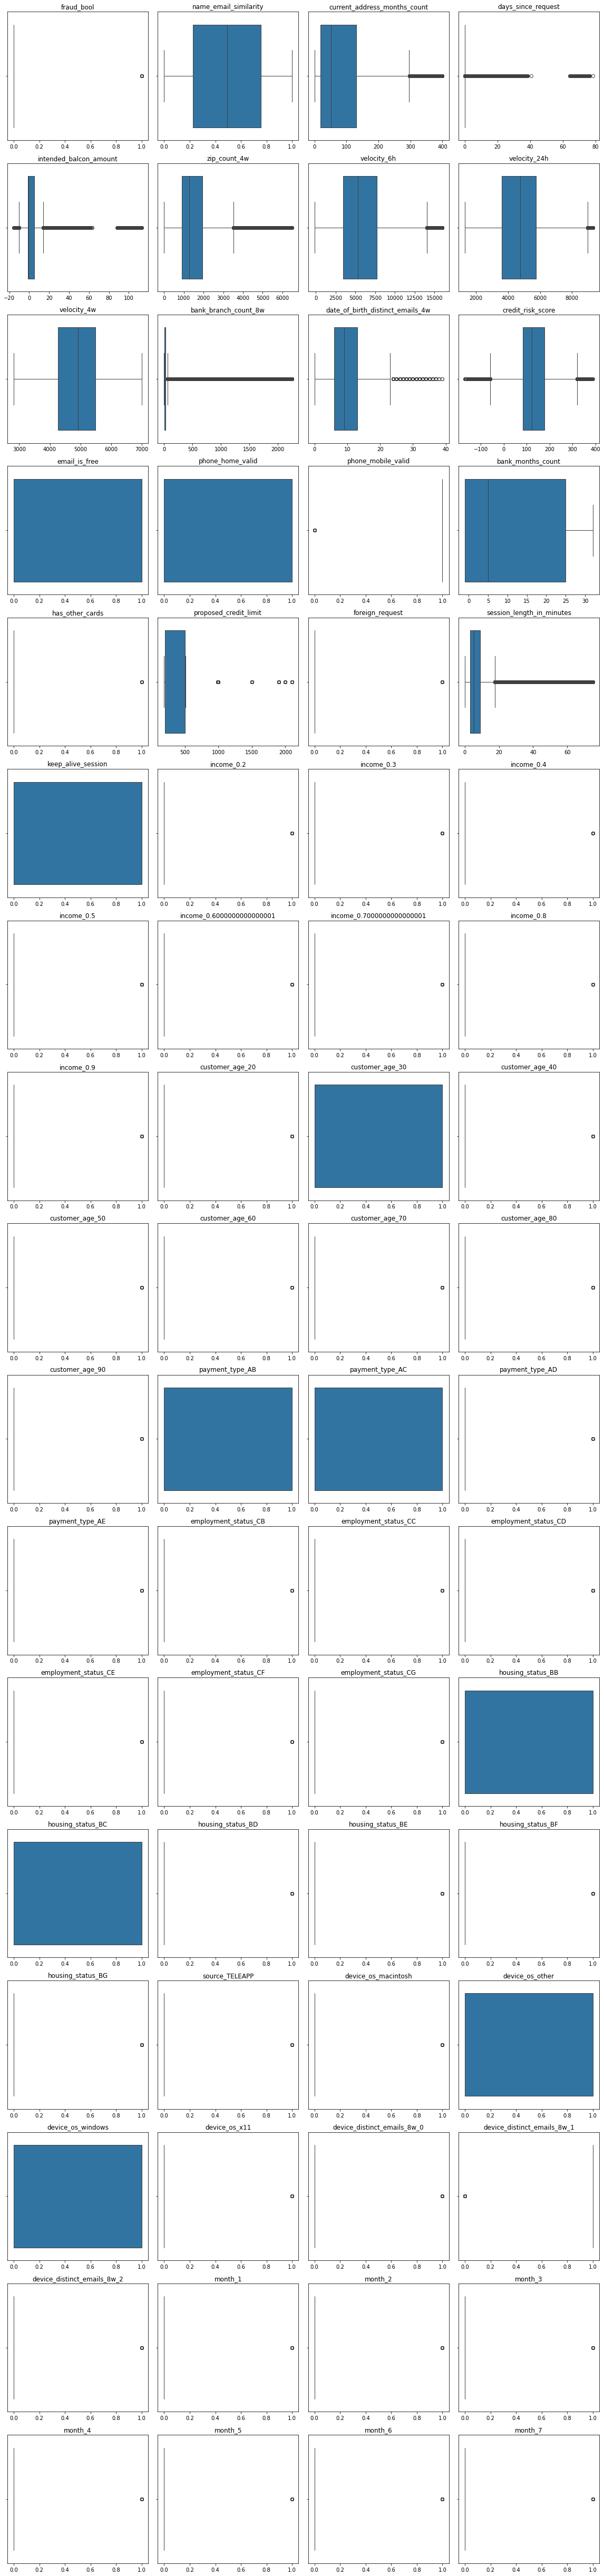

In [48]:
num_plots = len(num_cols)
num_cols_per_row = 4
num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(16, 4 * num_rows))  

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)  
    sns.boxplot(x=base[col])
    plt.title(f'{col}')
    plt.xlabel('') 
    plt.ylabel('') 

plt.tight_layout() 
plt.show()

In [49]:
base.to_csv('newbase.csv', index=False)